In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import seaborn as sns


In [ ]:
netflix_inf = pd.read_csv("/content/sample_data/netflix_titles.csv")
netflix_inf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix_inf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_shows = netflix_inf[netflix_inf['type'] == "TV Show"].copy()

In [ ]:
netflix_movies = netflix_inf[netflix_inf['type'] == "Movie"].copy()

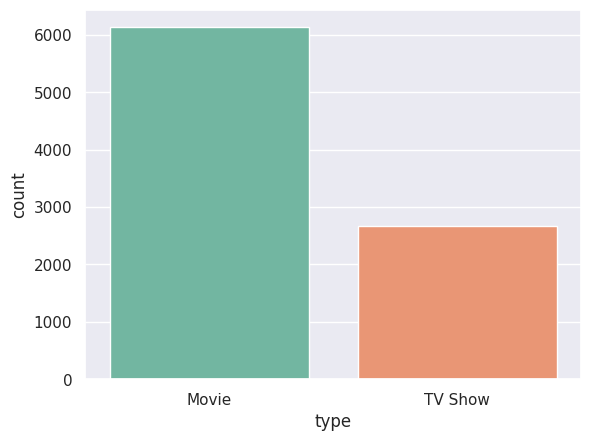

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_inf, hue="type", palette="Set2", legend=False)

Получается, что фильмов намного больше, чем сериалов


# Время длительности


In [ ]:
toptime = netflix_inf['duration'].value_counts()
toptime

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
...,...
228 min,1
18 min,1
205 min,1


In [ ]:
from plotly import graph_objects as go
fig = go.Figure([
    go.Bar(x=toptime.index, y=toptime.values, text=toptime.values, marker_color="pink")

])
fig.update_traces(texttemplate='%(text:.2s)', textposition='outside')
fig.show()

# Анализ фильмов

In [ ]:
netflix_inf.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

,0
date_added,0


In [ ]:
netflix_date.head()

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [ ]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [ ]:
netflix_date.sort_values(by=['year','month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


На пересечении мы видим сколько фильмов выходило в зависимости от года и месяца

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


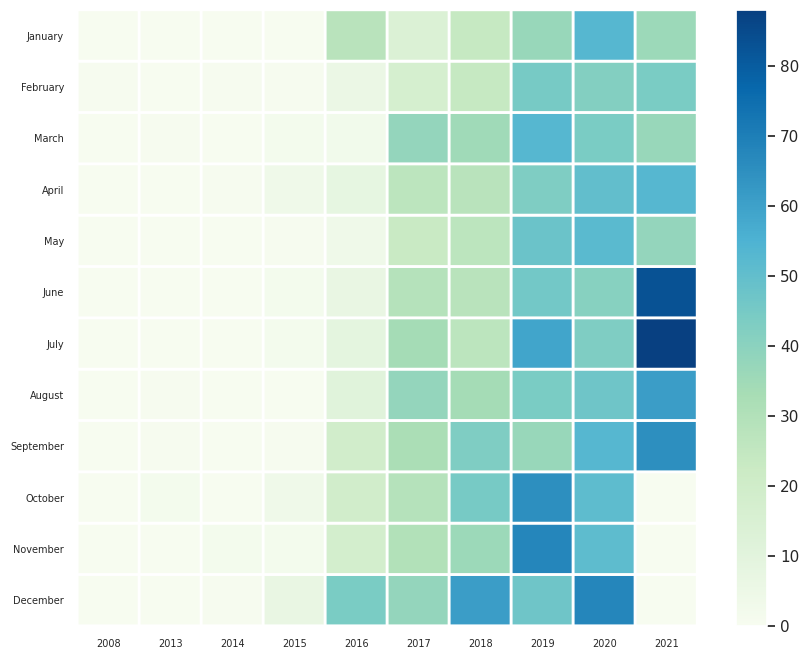

In [ ]:
plt.figure(figsize=(10,8), dpi=100)
plt.pcolor(df, cmap ="GnBu", edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5,len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5,len(df.index), 1), df.index, fontsize=7)

cbar = plt.colorbar()

plt.show()

Теперь найдем топ 15 годов по количеству выпущенных фильмов

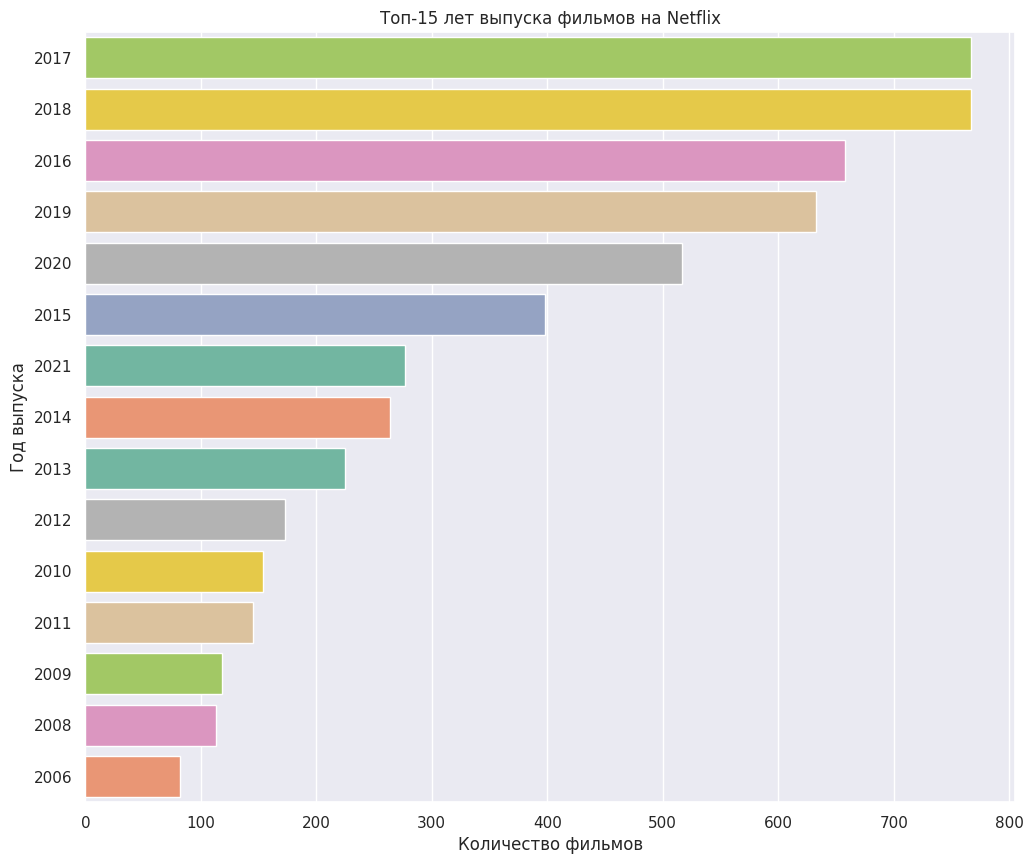

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=netflix_movies,hue='release_year',palette="Set2",legend=False, order=netflix_movies['release_year'].value_counts().index[0:15])


plt.title('Топ-15 лет выпуска фильмов на Netflix')
plt.xlabel('Количество фильмов')
plt.ylabel('Год выпуска')
plt.show()

Теперь можем посмотреть 10 стран, которые выпускают больше фильмов

In [ ]:
netflix_movies.isna().sum()

,0
show_id,0
type,0
title,0
director,188
cast,475
country,440
date_added,0
release_year,0
rating,2
duration,3


In [ ]:
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies.isna().sum()

,0
show_id,0
type,0
title,0
director,188
cast,475
country,0
date_added,0
release_year,0
rating,2
duration,3


In [ ]:
netflix_movies['country'].value_counts()

,count
country,
United States,2058
India,893
Unkmown,440
United Kingdom,206
Canada,122
...,...
"Germany, Canada, United States",1
"Denmark, United Kingdom, South Africa, Sweden, Belgium",1
"Serbia, South Korea, Slovenia",1


Так как в списке стран, некоторые страны указаны вместе, то нам нужно сделать подсчет вручную

In [47]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
  i = i.replace(' ', '')
  i = list(i.split(','))

  for j in i:
    if j in list(countries_mov.keys()):
      countries_mov[j]+=1
    else:
      countries_mov[j]=1


In [48]:
countries_mov

{'UnitedStates': 2752,
 'Unkmown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [49]:
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)
countries_fin = countries_fin[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unkmown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [51]:
names = [name for name, value in countries_fin]
names

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Unkmown',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China']

In [52]:
values = [value for name, value in countries_fin]
values

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

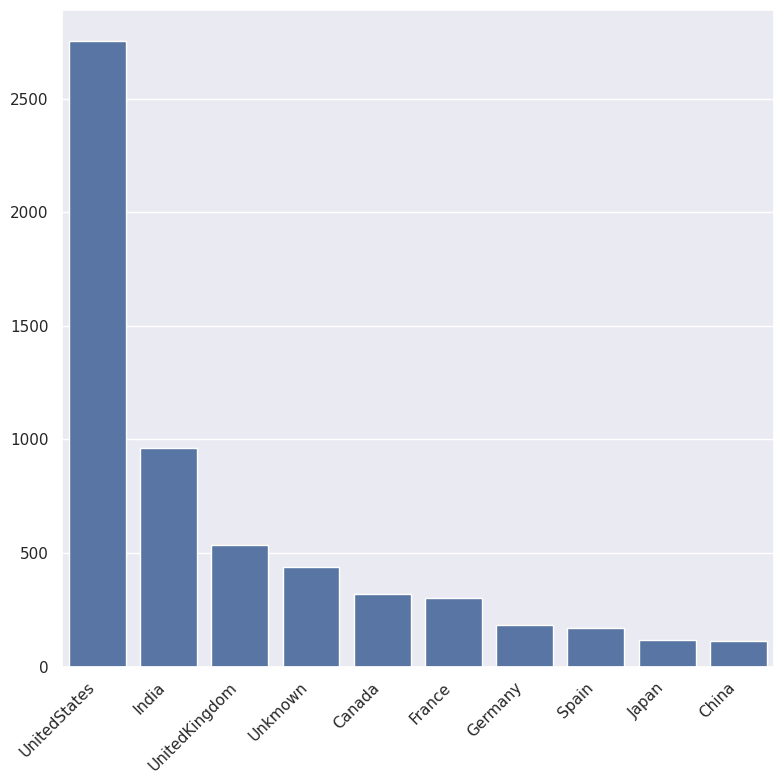

In [57]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)


ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Теперь проанализируем жанры фильмов. Все аналогично тому, как мы работали со странами

In [61]:
netflix_movies['listed_in']

,listed_in
0,Documentaries
6,Children & Family Movies
7,"Dramas, Independent Movies, International Movies"
9,"Comedies, Dramas"
12,"Dramas, International Movies"
...,...
8801,"Dramas, International Movies, Thrillers"
8802,"Cult Movies, Dramas, Thrillers"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [62]:
genre_mov = {}

gen = list(netflix_movies['listed_in'])
for i in gen:
  i = i.replace(' ', '')
  i = list(i.split(','))

  for j in i:
    if j in list(genre_mov.keys()):
      genre_mov[j]+=1
    else:
      genre_mov[j]=1

In [63]:
genre_mov

{'Documentaries': 869,
 'Children&FamilyMovies': 641,
 'Dramas': 2427,
 'IndependentMovies': 756,
 'InternationalMovies': 2752,
 'Comedies': 1674,
 'Thrillers': 577,
 'RomanticMovies': 616,
 'Music&Musicals': 375,
 'HorrorMovies': 357,
 'Sci-Fi&Fantasy': 243,
 'Action&Adventure': 859,
 'ClassicMovies': 116,
 'AnimeFeatures': 71,
 'SportsMovies': 219,
 'CultMovies': 71,
 'Faith&Spirituality': 65,
 'LGBTQMovies': 102,
 'Stand-UpComedy': 343,
 'Movies': 57}

In [64]:
genre_mov = sorted(genre_mov.items(), key=lambda item: genre_mov[item[0]], reverse=True)
genre_mov = genre_mov[:10]
genre_mov

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375)]

In [65]:
names = [name for name, value in genre_mov]
names

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Music&Musicals']

In [66]:
values = [value for name, value in genre_mov]
values

[2752, 2427, 1674, 869, 859, 756, 641, 616, 577, 375]

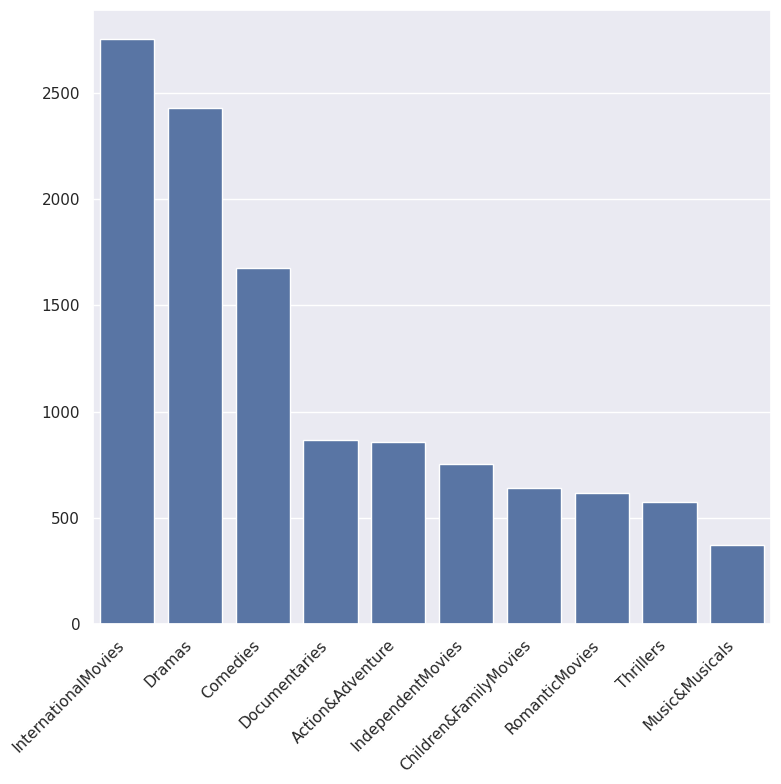

In [71]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)


ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Анализ сериалов

Для начала проанализируем страны, которые выпуска.т сериалы

In [72]:
netflix_shows.isna().sum()

,0
show_id,0
type,0
title,0
director,2446
cast,350
country,391
date_added,10
release_year,0
rating,2
duration,0


In [74]:
netflix_shows['country'].fillna('Unknown', inplace=True)
netflix_shows.isna().sum()

,0
show_id,0
type,0
title,0
director,2446
cast,350
country,0
date_added,10
release_year,0
rating,2
duration,0


In [75]:
netflix_shows['country'].value_counts()

,count
country,
United States,760
Unknown,391
United Kingdom,213
Japan,169
South Korea,158
...,...
"Ireland, Canada, United States, United Kingdom",1
"Germany, United States, Italy",1
"United Kingdom, United States, Czech Republic",1


In [77]:
countries_show = {}

cou = list(netflix_shows['country'])
for i in cou:
  i = i.replace(' ', '')
  i = list(i.split(','))

  for j in i:
    if j in list(countries_show.keys()):
      countries_show[j]+=1
    else:
      countries_show[j]=1

In [78]:
countries_show

{'SouthAfrica': 11,
 'Unknown': 391,
 'India': 84,
 'UnitedKingdom': 272,
 'UnitedStates': 938,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 66,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 199,
 'Belgium': 12,
 'France': 90,
 'SouthKorea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'NewZealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'UnitedArabEmirates': 1,
 'Norway': 9,
 'CzechRepublic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'SaudiArabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'HongKong': 5,
 'Croatia': 1,
 'WestGermany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'G

In [79]:
countries_show = sorted(countries_show.items(), key=lambda item: countries_show[item[0]], reverse=True)
countries_show = countries_show[:10]
countries_show

[('UnitedStates', 938),
 ('Unknown', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [81]:
names = [name for name, value in countries_show]
names

['UnitedStates',
 'Unknown',
 'UnitedKingdom',
 'Japan',
 'SouthKorea',
 'Canada',
 'France',
 'India',
 'Taiwan',
 'Australia']

In [82]:
values = [value for name, value in countries_show]
values

[938, 391, 272, 199, 170, 126, 90, 84, 70, 66]

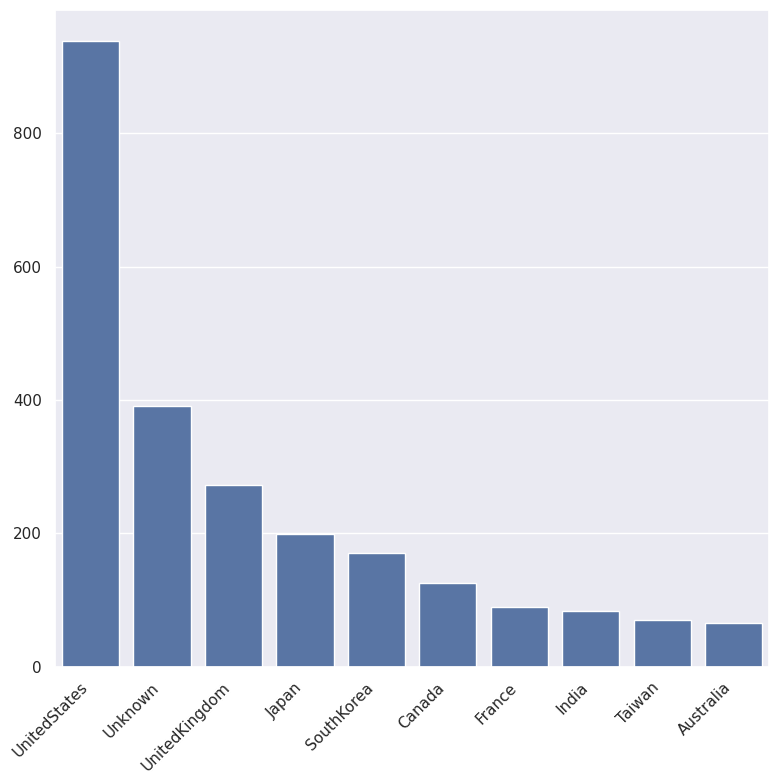

In [83]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)


ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Найдем сериалы с самым юольшим количеством сезонов

In [84]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [86]:
durations.loc[:, 'no_of_seasons'] = durations['duration'].str.replace(' Season', '')
durations

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2s
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2s
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2s
8796,Yunus Emre,2 Seasons,2s
8797,Zak Storm,3 Seasons,3s
8800,Zindagi Gulzar Hai,1 Season,1


In [88]:
durations.loc[:, 'no_of_seasons'] = durations['duration'].str.replace('s', '')
durations

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2 Seaon
2,Ganglands,1 Season,1 Seaon
3,Jailbirds New Orleans,1 Season,1 Seaon
4,Kota Factory,2 Seasons,2 Seaon
5,Midnight Mass,1 Season,1 Seaon
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2 Seaon
8796,Yunus Emre,2 Seasons,2 Seaon
8797,Zak Storm,3 Seasons,3 Seaon
8800,Zindagi Gulzar Hai,1 Season,1 Seaon


In [94]:
durations['no_of_seasons'] = (durations['duration'].str.replace('[^0-9]', '', regex=True).replace('', '0'))
durations

<ipython-input-94-a9fbfa444c64>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [112]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)


In [118]:
bottom = top[0:20]


import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'], bottom['no_of_seasons']]))
    ]
)
fig.show()

In [115]:
bottom = top.sort_values(by='no_of_seasons')
bottom = bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'], bottom['no_of_seasons']]))
    ]
)
fig.show()

# Система рекомендаций

Каждый пользователь смотрит какие-либо фильмы и сериалы, на основании уже просмотренных им сериалов и фильмов, можно рекомендовать ему что-то похожее
Воспользуемся методом TF-IDF

In [120]:
netflix_movies['description']

,description
0,"As her father nears the end of his life, filmm..."
6,Equestria's divided. But a bright-eyed hero be...
7,"On a photo shoot in Ghana, an American model s..."
9,A woman adjusting to life after a loss contend...
12,After most of her family is murdered in a terr...
...,...
8801,Recovering alcoholic Talal wakes up inside a s...
8802,"A political cartoonist, a crime reporter and a..."
8804,Looking to survive in a world taken over by zo...
8805,"Dragged from civilian life, a former superhero..."


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
netflix_movies['description'] = netflix_movies['description'].fillna('')
netflix_movies['description'].isna().sum()

np.int64(0)

In [123]:
netflix_movies['description'].head()

,description
0,"As her father nears the end of his life, filmm..."
6,Equestria's divided. But a bright-eyed hero be...
7,"On a photo shoot in Ghana, an American model s..."
9,A woman adjusting to life after a loss contend...
12,After most of her family is murdered in a terr...


In [124]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_movies['description'])

tfidf_matrix.shape

(6131, 15483)

Здесь 15483 слова, которые описывают 6131 фильм

Для дaльнейших действий мы бyдeм использовать косинусную похожость

In [125]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01624469,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03650444],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01624469, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03650444, ..., 0.        , 0.        ,
        1.        ]])

In [126]:
cosine_sim.shape

(6131, 6131)

In [127]:
indices = pd.Series(netflix_movies.index, index=netflix_movies['title']).drop_duplicates()
indices

,0
title,
Dick Johnson Is Dead,0
My Little Pony: A New Generation,6
Sankofa,7
The Starling,9
Je Suis Karl,12
...,...
Zinzana,8801
Zodiac,8802
Zombieland,8804


In [128]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


In [129]:
def get_recommendation(title, cosine_sim=cosine_sim_df):
  idx = indices[title]

  #похожести
  sim_scores = list(enumerate(cosine_sim_df.loc[title]))
  #сортируем
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]

  movie_indices = [i[0] for i in sim_scores]

  return netflix_movies['title'].iloc[movie_indices]



In [130]:
netflix_movies[netflix_movies['title'] == 'The Starling'].description.iloc[0]

"A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward."

In [131]:
get_recommendation('The Starling')

,title
7533,My Daddy is in Heaven
1899,Turkish Dance School
4720,Chillar Party
1557,Canvas
6688,Emma' (Mother)
2502,Escaping Tel Aviv
4864,Spivak
7827,Ram Teri Ganga Maili
4158,Nathicharami
7841,Recall


In [132]:
netflix_movies[netflix_movies['title'] == 'My Daddy is in Heaven'].description.iloc[0]

'After the sudden loss of her husband, a mother has a crisis of faith and struggles to keep her life together for the sake of her daughter and herself.'